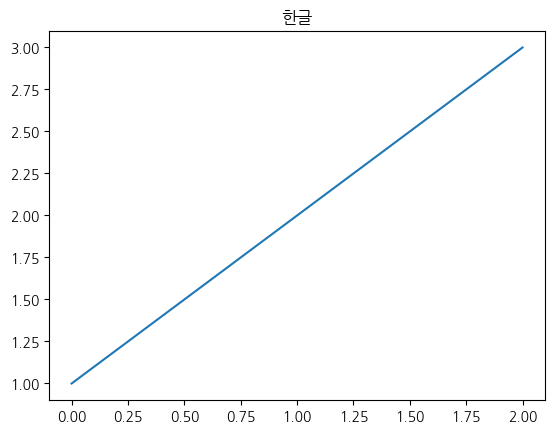

In [36]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

### 데이터 정리

In [37]:
df = pd.read_csv('./for_model_total.csv')
df['연령대2030_거주인구수'] = df['연령대_20_거주인구수'] + df['연령대_30_거주인구수']

features = ['1인가구','2인가구','월평균_총생활인구수','연령대2030_거주인구수','연령대60_평균','PET 총량']
x_features = ['1인가구', '2인가구', '월평균_총생활인구수', '연령대2030_거주인구수', '연령대60_평균']

df_1 = df[features]
df_1.head(3)

,1인가구,2인가구,월평균_총생활인구수,연령대2030_거주인구수,연령대60_평균,PET 총량
0,71046,53275,5.892936e+08,147280.083333,5.143368e+07,2680.0
1,50316,47737,3.672376e+08,115867.750000,4.517363e+07,2886.3
2,45685,36432,2.147731e+08,72902.333333,2.725101e+07,1147.1


### 스케일링

In [38]:
# 표준 스케일러 생성
scaler = MinMaxScaler()

# 데이터프레임의 특정 열(또는 모든 열)을 표준화
df_1[x_features] = scaler.fit_transform(df_1[x_features])
scaled_df = df_1.copy()
scaled_df['PET 총량'] = np.log(scaled_df['PET 총량'])

scaled_df.head()

,1인가구,2인가구,월평균_총생활인구수,연령대2030_거주인구수,연령대60_평균,PET 총량
0,0.424180,0.743270,1.000000,0.758189,0.813064,7.893572
1,0.241853,0.635788,0.483198,0.545882,0.660692,7.967731
2,0.201122,0.416380,0.128360,0.255491,0.224450,7.044992
3,0.557218,0.974226,0.543780,0.907002,0.623025,7.442083
4,1.000000,0.848734,0.485048,0.994658,0.433088,7.964573


### 다중공선성

In [39]:
# 다중공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수를 분리합니다.
X = scaled_df[x_features]
y = scaled_df['PET 총량']

# VIF를 계산합니다.
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 값을 출력합니다.
print(vif)

        Features         VIF
0           1인가구   28.206488
1           2인가구  105.889072
2     월평균_총생활인구수   43.989609
3  연령대2030_거주인구수  210.645343
4       연령대60_평균   59.212396


### 주성분 분석

In [40]:
from sklearn.decomposition import PCA

# PCA 모델 생성 
pca = PCA()

# PCA 모델 학습 : y 변수를 제외하고 X 변수들만을 사용하여 주성분을 생성하는 것이 보편적인 방법
pca.fit(scaled_df[x_features])

# 주성분(PC) 확인
print("주성분(PC) 분산 설명 비율:")
print(pca.explained_variance_ratio_)

# 주성분(PC) 누적 설명 분산 비율 확인
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
print("\n누적 설명 분산 비율:")
print(cumulative_variance_ratio)

주성분(PC) 분산 설명 비율:
[0.84746354 0.10837608 0.03505499 0.00628291 0.00282248]

누적 설명 분산 비율:
[0.84746354 0.95583961 0.99089461 0.99717752 1.        ]


### 다중선형회귀

#### 사이킷런 >> 모델 summary가 번거로워 삭제

In [48]:
"""
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from sklearn.linear_model import LinearRegression


# PCA 모델 생성
pca = PCA(n_components=3)  

# 주성분 분석을 위한 데이터 변환
X_pca = pca.fit_transform(scaled_df[x_features])
y = scaled_df['PET 총량']


# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)

# 다중회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 회귀 계수 확인
coefficients = model.coef_
intercept = model.intercept_
print("회귀 계수 (coefficients):", coefficients)
print("절편 (intercept):", intercept)

# 모델 평가 (RMSE 및 MAE)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

"""

'\nfrom sklearn.decomposition import PCA\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error\nimport numpy as np\nfrom sklearn.linear_model import LinearRegression\n\n\n# PCA 모델 생성\npca = PCA(n_components=3)  \n\n# 주성분 분석을 위한 데이터 변환\nX_pca = pca.fit_transform(scaled_df[x_features])\ny = scaled_df[\'PET 총량\']\n\n\n# 학습 데이터와 테스트 데이터 분할\nX_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)\n\n# 다중회귀 모델 학습\nmodel = LinearRegression()\nmodel.fit(X_train, y_train)\n\n# 회귀 계수 확인\ncoefficients = model.coef_\nintercept = model.intercept_\nprint("회귀 계수 (coefficients):", coefficients)\nprint("절편 (intercept):", intercept)\n\n# 모델 평가 (RMSE 및 MAE)\ny_pred = model.predict(X_test)\nrmse = np.sqrt(mean_squared_error(y_test, y_pred))\nmae = mean_absolute_error(y_test, y_pred)\n\nprint(f"RMSE: {rmse}")\nprint(f"MAE: {mae}")\n\n'

 #### statsmodel

In [46]:
import statsmodels.api as sm
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np

# PCA 모델 생성
pca = PCA(n_components=3)

# 주성분 분석을 위한 데이터 변환
X_pca = pca.fit_transform(scaled_df[x_features])
y = scaled_df['PET 총량']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)

# 상수 (절편) 항 추가
X_train_const = sm.add_constant(X_train)

# OLS(Ordinary Least Squares) 모델을 생성하고 학습
model = sm.OLS(y_train, X_train_const).fit()

# 회귀 계수 확인
coefficients = model.params
print("회귀 계수 (coefficients):")
print(coefficients)

# 모델 평가 (RMSE 및 MAE)
X_test_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_const)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


회귀 계수 (coefficients):
const    7.291445
x1       0.634427
x2       0.506463
x3      -0.394177
dtype: float64
RMSE: 0.374168835639672
MAE: 0.33796449690367475


In [47]:
model.summary()

# 여러 모델 중에서 가장 낮은 AIC 또는 BIC 값을 가진 모델을 선택하는 것이 일반적으로 더 적합한 모델로 간주


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PET 총량   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     10.11
Date:                Sun, 22 Oct 2023   Prob (F-statistic):           0.000395
Time:                        21:54:11   Log-Likelihood:                -1.3008
No. Observations:                  22   AIC:                             10.60
Df Residuals:                      18   BIC:                             14.97
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2914      0.062    118.150      0.000       7.162       7.421
x1             0.6344      0.132      4.806      0.000       0.357       0.912
x2             0.5065      0.376      1.347      0.195      -0.284       1.297
x3            -0.3942      0.706     -0.558      0.583      -1.877       1.089
==============================================================================
Omnibus:                        0.767   Durbin-Watson:                   2.502
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.153
Skew:                          -0.191   Prob(JB):                        0.926
Kurtosis:                       3.146   Cond. No.                         11.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# scaled_df['PET 총량'].describe()

count    25.000000
mean      7.278442
std       0.431113
min       6.569201
25%       6.880384
50%       7.369601
75%       7.562162
max       7.967731
Name: PET 총량, dtype: float64

### 회귀모형의 잔차 검증(등분산성, 정규성, 독립성)
- 등분산성: 잔차 대 예측값 산점도에서 잔차가 예측값에 대해 무작위로 분포되어 있는지 확인합니다. 잔차가 특정 패턴을 보이지 않는 것이 바람직합니다.
- 정규성: Q-Q 플롯과 Shapiro-Wilk 테스트를 사용하여 잔차가 정규 분포를 따르는지 확인합니다. Q-Q 플롯이 직선에 가까울수록 정규성을 만족합니다.
- 독립성: Durbin-Watson 테스트를 사용하여 잔차의 독립성을 확인합니다. Durbin-Watson 통계량은 0과 4 사이의 값을 가지며, 2에 가까울수록 독립성을 만족합니다.
---
- 잔차의 특성을 검증하여 회귀 모델의 가정을 확인하고 모델을 개선하거나 신뢰성을 평가할 수 있습니다. 
- 이러한 검증 과정은 모델의 예측력을 높이고 모델을 신뢰할 수 있게 만드는 데 도움이 됩니다.





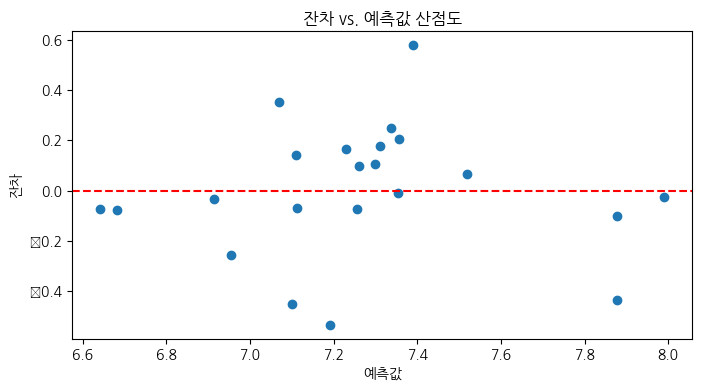

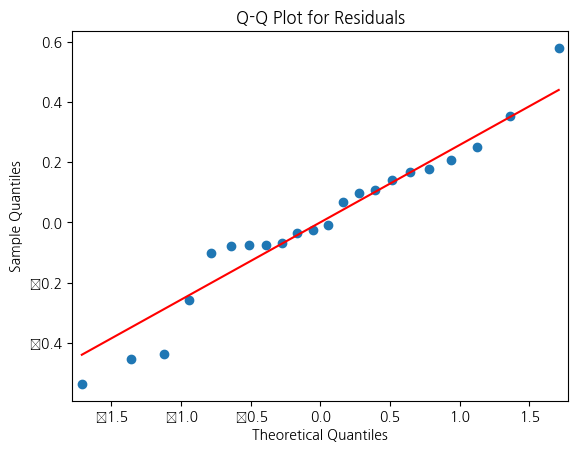

Shapiro-Wilk Test Statistic: 0.9605545997619629
Shapiro-Wilk p-value: 0.5005720257759094
Durbin-Watson Statistic: 2.502193005529854


In [43]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# 예측값과 실제값을 비교하여 잔차 계산
predicted_values = model.predict(X_train)  # 여기서 model은 다중회귀 모델을 의미합니다.
residuals = y_train - predicted_values  # y는 실제 종속 변수입니다.

# 잔차 vs. 예측값 산점도 (등분산성 확인)
plt.figure(figsize=(8, 4))
plt.scatter(predicted_values, residuals)
plt.xlabel("예측값")
plt.ylabel("잔차")
plt.title("잔차 vs. 예측값 산점도")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 잔차의 정규성 검증 (Q-Q 플롯 및 Shapiro-Wilk 테스트)
sm.qqplot(residuals, line='s')
plt.title("Q-Q Plot for Residuals")
plt.show()

shapiro_test_statistic, shapiro_p_value = stats.shapiro(residuals)
print("Shapiro-Wilk Test Statistic:", shapiro_test_statistic)
print("Shapiro-Wilk p-value:", shapiro_p_value)

# 잔차의 독립성 검증 (Durbin-Watson 테스트)
durbin_watson_statistic = np.sum(np.diff(residuals)**2) / np.sum(residuals**2)
print("Durbin-Watson Statistic:", durbin_watson_statistic)